<a href="https://colab.research.google.com/github/ctk03272/cns_keras_study/blob/master/keras_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(8, input_dim=4,  activation='relu', kernel_initializer="uniform"))
model.add(Dense(6, activation='relu', kernel_initializer="uniform"))
model.add(Dense(1, activation='sigmoid', kernel_initializer="uniform"))

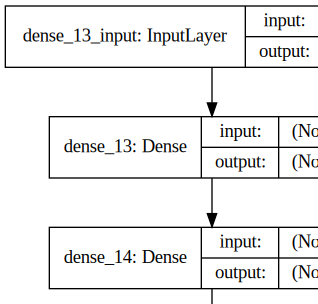

In [17]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

   sepal length  sepal width  petal length  petal width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


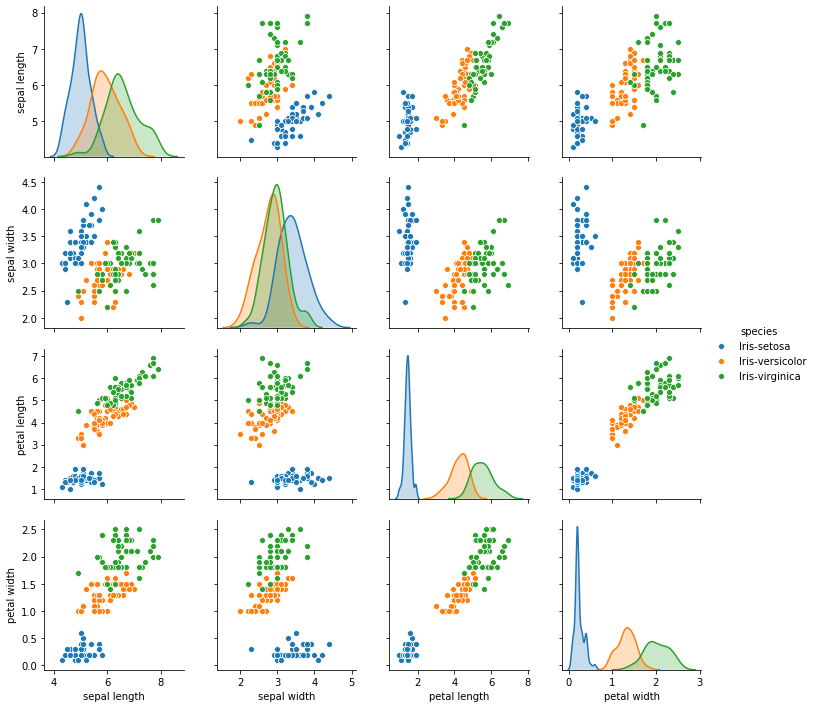

Epoch 1/500
150/150 [==============================] - 0s 3ms/step - loss: 1.5778 - acc: 0.0800
Epoch 2/500
150/150 [==============================] - 0s 943us/step - loss: 0.9079 - acc: 0.6467
Epoch 3/500
150/150 [==============================] - 0s 1ms/step - loss: 0.7064 - acc: 0.7067
Epoch 4/500
150/150 [==============================] - 0s 920us/step - loss: 0.6030 - acc: 0.6800
Epoch 5/500
150/150 [==============================] - 0s 1ms/step - loss: 0.5331 - acc: 0.7467
Epoch 6/500
150/150 [==============================] - 0s 960us/step - loss: 0.4887 - acc: 0.8333
Epoch 7/500
150/150 [==============================] - 0s 985us/step - loss: 0.4589 - acc: 0.7467
Epoch 8/500
150/150 [==============================] - 0s 925us/step - loss: 0.4280 - acc: 0.9467
Epoch 9/500
150/150 [==============================] - 0s 915us/step - loss: 0.4028 - acc: 0.9267
Epoch 10/500
150/150 [==============================] - 0s 950us/step - loss: 0.3738 - acc: 0.9533
Epoch 11/500
150/150 [===

In [44]:
# 참고 사이트 
# https://thebook.io/006958/part04/ch12/
# https://tykimos.github.io/2017/02/04/MLP_Getting_Started/

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils


# 랜덤시드 고정시키기
# np.random.seed(5)

# 사용한 예제 데이터
# https://archive.ics.uci.edu/ml/machine-learning-databases/iris/
df =pd.read_csv("./iris.data", delimiter="\t", names=('sepal length', 'sepal width', 'petal length', 'petal width', 'species'))
print(df.head())
sns.pairplot(df, hue='species');
plt.show()

# 데이터 분류
dataset=df.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:,4]

# 문자열을 숫자로 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = np_utils.to_categorical(Y)

# 모델의 설정
# 소프트 맥스는 총합이 1인 형태로 바꿔서 계산해 주는 함수
# 합계가 1인 형태로 변환하면 큰 값이 두드러지게 나타나고 작은 값은 더 작아진다.
# 이 값이 교차 에트로피를 지나 [1.,0.,0.]으로 변화하게 되면 우리가 원하는 원-핫 인코딩 값, 즉 하나만 1이고 나머지는 모두 0인 형태로 전환시킬 수 있다.
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 컴파일
# 다중 분류에 적절한 오차 함수인 categorical_crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 실행

model.fit(X, Y_encoded, epochs=500, batch_size=1)



# 결과 출력

print("\n Accuracy: %.4f" % (model.evaluate(X, Y_encoded)[1]))